# RICE_QUALITY_DETECTION_USING_IMAGE_PROCESSING AND DATA VIZUALIZATION

# DOWNLOADING MODULES

In [4]:
!pip install Brotli==1.0.7
!pip install click==7.1.2
!pip install dash==1.12.0
!pip install dash-bootstrap-components==0.10.0
!pip install dash-core-components==1.10.0
!pip install dash-html-components==1.0.3
!pip install dash-renderer==1.4.1
!pip install dash-table==4.7.0
!pip install Flask==1.1.2
!pip install Flask-Compress==1.5.0
!pip install future==0.18.2
!pip install itsdangerous==1.1.0
!pip install Jinja2==2.11.2
!pip install MarkupSafe==1.1.1
!pip install numpy==1.18.4
!pip install opencv-contrib-python==4.2.0.34
!pip install Pillow==7.1.2
!pip install plotly==4.7.1
!pip install retrying==1.3.3
!pip install six==1.14.0
!pip install Werkzeug==1.0.1

In [3]:
!pip install plotly

# IMPORTING DATASETS 

In [36]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
from plotly import subplots
import pandas as pd
import plotly.express as px
import numpy as np
from dash.dependencies import Input, Output, State
import cv2
import PIL.Image as image 
from io import BytesIO
import base64
app = dash.Dash(__name__)

# project explanation

In [9]:
text1="""
	Rice is favorable and high consumed cereal grain in Asian countries. It can be easily found all over the world. Many value added products are produced by using rice for human beings . In the rice market, key determinant of milled rice is quality. The quality measurement becomes more important with the import and export trade. Rice samples contain different dispensable objects like paddy, chaff, damaged grains, weed seeds, stones etc. Rice quality is varying according to these impurity content. 
"""
text2="""
The main purpose of the proposed method is, to offer an alternative way for quality control and analysis which reduce the required effort, cost and time. Image processing is significant and advanced technological area where important developments have been made. 
"""
text3="""
In agricultural and farming production quality control and analysis of manufactured goods is vital. Quality of grain is analyzed visually by veteran person and technician. But the effect of such measurement is changing in results and prolonged. The excellence and quality also influenced by the mood and atmosphere of technician; so to overcome the shortcoming occurred due to conventional methods advanced technique i.e. Image processing technique is projected, to Maintaining the Integrity of the Specifications. 
"""
text4="""
Image processing manipulates image for performing some operations on targeted image to get an improved and desirable image. And extort some valuable information from input image. Nowadays, image processing is hastily growing technologies. All types of data have to go through three general phases while using digital image processing technique which are pre-processing, enhancement, and display, information extraction.
"""
text5="""
The Agricultural industry on the whole is very vast and ancient. Quality assessment of grains is a very big challenge since time immemorial. The project presents a solution for quality evaluation and grading of rice grains using image processing techniques. Commercially the grading of rice is done according to the size of the grain (full, half or broken). The food grains quality are rapidly assessed through visual inspection by human inspectors. The decision making capabilities of human-inspectors are subjected to external influences such as fatigue, vengeance, bias etc. With the help of image processing techniques we can overcome that and which are also a non-destructive and cost-effective techniques. Here we also discuss the procedure used to obtain the percentage quality of rice grains. Rice quality is nothing but the combination of physical and chemical characteristics. Grain size and shape, chalkiness, whiteness, milling degree, bulk density and moisture content are some physical characteristics, gelatinization temperature and gel consistency are chemical characteristics of rice.
"""
text6="""
Many studies that consider the morphological features of grains such as its area, shape etc. have already been performed. However, the shapes and sizes of the different varieties are too varied to generalize a common formula for the classification of all varieties of rice.
"""

# classification of images

In [10]:
def get_classification(ratio):
    ratio =round(ratio,1)
    toret=""
    if(ratio>=3 and ratio<3.5):
        toret="Slender"
    elif(ratio>=2.1 and ratio<3):
        toret="Medium"
    elif(ratio>=1.1 and ratio<2.1):
        toret="Bold"
    elif(ratio>0.9 and ratio<=1):
        toret="Round"
    else:
        toret="Dust"
    return toret

In [11]:
classification = {"Slender":0, "Medium":0, "Bold":0, "Round":0, "Dust":0}
avg = {"Slender":0, "Medium":0, "Bold":0, "Round":0, "Dust":0}

# load in greyscale mode

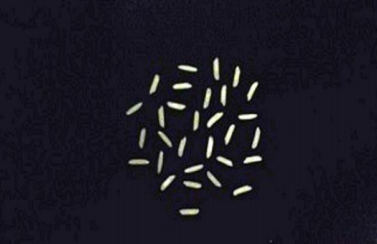

In [12]:
from IPython.display import display, Image
img = cv2.imread("rice.png",0)
display(Image(filename='rice.png'))

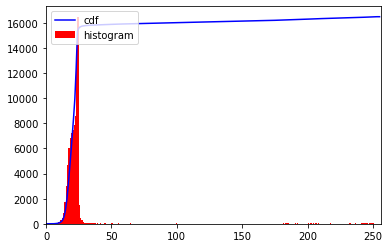

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('rice.png',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# convert into binary

In [14]:
# 160 - threshold, 255 - value to assign, THRESH_BINARY_INV - Inverse binary
ret,binary = cv2.threshold(img,160,255,cv2.THRESH_BINARY)

# averaging filter

In [15]:
kernel = np.ones((5,5),np.float32)/9
dst = cv2.filter2D(binary,-1,kernel)
# -1 : depth of the destination image

In [16]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

# erosion

In [17]:
erosion = cv2.erode(dst,kernel2,iterations = 1)

# dilation

In [18]:
dilation = cv2.dilate(erosion,kernel2,iterations = 1)

# edge detection

In [19]:
edges = cv2.Canny(dilation,100,200)

# Size detection

In [20]:
contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [21]:
print("No. of rice grains=",len(contours))

No. of rice grains= 30


In [22]:
total_ar=0

# counting impurities

In [23]:
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    if(aspect_ratio<1):
        aspect_ratio=1/aspect_ratio
    print(round(aspect_ratio,2),get_classification(aspect_ratio))
    classification[get_classification(aspect_ratio)] += 1
    if get_classification(aspect_ratio) != "Dust":
        total_ar+=aspect_ratio
    if get_classification(aspect_ratio) != "Dust":
        avg[get_classification(aspect_ratio)] += aspect_ratio

3.17 Slender
1.73 Bold
2.38 Medium
1.07 Bold
1.14 Bold
2.11 Medium
4.0 Dust
1.55 Bold
2.11 Medium
3.5 Dust
2.22 Medium
2.75 Medium
1.14 Bold
3.0 Slender
2.2 Medium
1.91 Bold
2.86 Medium
1.12 Bold
2.86 Medium
3.0 Slender
1.33 Bold
2.11 Medium
2.33 Medium
3.0 Slender
2.38 Medium
1.67 Bold
1.73 Bold
2.62 Medium
2.86 Medium
3.14 Slender


In [24]:
avg_ar=total_ar/len(contours)

In [25]:
if classification['Slender']!=0:
    avg['Slender'] = avg['Slender']/classification['Slender']
if classification['Medium']!=0:
    avg['Medium'] = avg['Medium']/classification['Medium']
if classification['Bold']!=0:
    avg['Bold'] = avg['Bold']/classification['Bold']
if classification['Round']!=0:
    avg['Round'] = avg['Round']/classification['Round']


The image


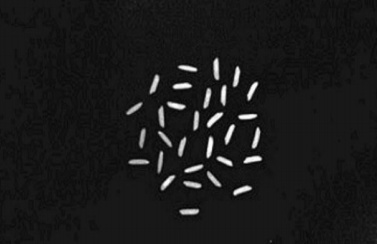

The binary form of image


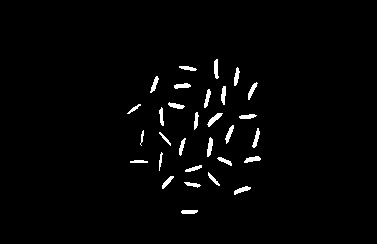

The dust form of image


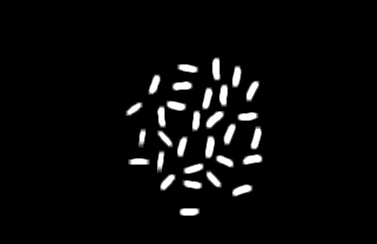

The erosion form of image


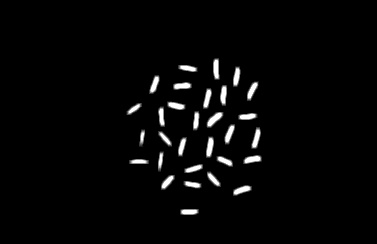

The dialation form of image


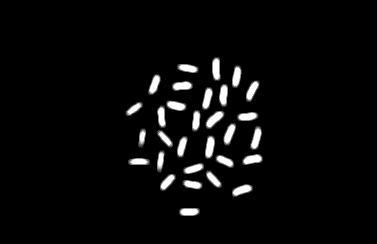

The edges form of image


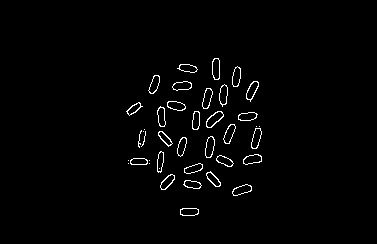

In [26]:
cv2.imwrite("img.jpg", img)
cv2.imwrite("binary.jpg", binary)
cv2.imwrite("dst.jpg", dst)
cv2.imwrite("erosion.jpg", erosion)
cv2.imwrite("dilation.jpg", dilation)
cv2.imwrite("edges.jpg", edges)
print("The image")
display(Image(filename='img.jpg'))
print("The binary form of image")
display(Image(filename='binary.jpg'))
print("The dust form of image")
display(Image(filename='dst.jpg'))
print("The erosion form of image")
display(Image(filename='erosion.jpg'))
print("The dialation form of image")
display(Image(filename='dilation.jpg'))
print("The edges form of image")
display(Image(filename='edges.jpg'))

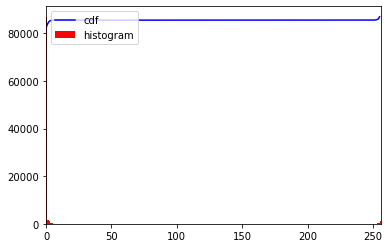

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('edges.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# converting rgb to bgr

In [28]:
def readb64(base64_string):
    sbuf = BytesIO()
    sbuf.write(base64.b64decode(base64_string))
    pimg = Image.open(sbuf)
    return cv2.cvtColor(np.array(pimg), cv2.COLOR_RGB2BGR)

# updating image

In [29]:
def update_image(pic):
    img = readb64(pic)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    classification1 = {"Slender":0, "Medium":0, "Bold":0, "Round":0, "Dust":0}
    avg1 = {"Slender":0, "Medium":0, "Bold":0, "Round":0, "Dust":0}
    #convert into binary
    ret,binary = cv2.threshold(img,160,255,cv2.THRESH_BINARY)# 160 - threshold, 255 - value to assign, THRESH_BINARY_INV - Inverse binary
    #averaging filter
    kernel = np.ones((5,5),np.float32)/9
    dst = cv2.filter2D(binary,-1,kernel)# -1 : depth of the destination image

    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

    #erosion
    erosion = cv2.erode(dst,kernel2,iterations = 1)

    #dilation 
    dilation = cv2.dilate(erosion,kernel2,iterations = 1)

    #edge detection
    edges = cv2.Canny(dilation,100,200)

    ### Size detection
    _, contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #print("No. of rice grains=",len(contours))
    total_ar1=0
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        aspect_ratio = float(w)/h
        if(aspect_ratio<1):
            aspect_ratio=1/aspect_ratio
        #print(round(aspect_ratio,2),get_classification(aspect_ratio))
        classification1[get_classification(aspect_ratio)] += 1
        if get_classification(aspect_ratio) != "Dust":
            total_ar1+=aspect_ratio
        if get_classification(aspect_ratio) != "Dust":
            avg1[get_classification(aspect_ratio)] += aspect_ratio
    avg_ar1=total_ar1/len(contours)
    if classification1['Slender']!=0:
        avg1['Slender'] = avg1['Slender']/classification1['Slender']
    if classification1['Medium']!=0:
        avg1['Medium'] = avg1['Medium']/classification1['Medium']
    if classification1['Bold']!=0:
        avg1['Bold'] = avg1['Bold']/classification1['Bold']
    if classification1['Round']!=0:
        avg1['Round'] = avg1['Round']/classification1['Round']
    cv2.imwrite("img1.jpg", img)
    cv2.imwrite("binary1.jpg", binary)
    cv2.imwrite("dst1.jpg", dst)
    cv2.imwrite("erosion1.jpg", erosion)
    cv2.imwrite("dilation1.jpg", dilation)
    cv2.imwrite("edges1.jpg", edges)
    return classification1,avg1,avg_ar1

# displaying image

In [37]:
def get_image(path):
    img = image.open(path)
    # Constants
    img_width = 710
    img_height = 550
    scale_factor = 0.5
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=[0, img_width * scale_factor],
            y=[0, img_height * scale_factor],
            mode="markers",
            marker_opacity=0
        )
    )
    fig.update_xaxes(
        visible=False,
        range=[0, img_width * scale_factor]
    )
    fig.update_yaxes(
        visible=False,
        range=[0, img_height * scale_factor],
        scaleanchor="x"
    )
    fig.add_layout_image(
        dict(
            x=0,
            sizex=img_width * scale_factor,
            y=img_height * scale_factor,
            sizey=img_height * scale_factor,
            xref="x",
            yref="y",
            opacity=1.0,
            layer="below",
            sizing="stretch",
            source=img)
    )
    fig.update_layout(
        width=img_width * scale_factor,
        height=img_height * scale_factor,
        margin={"l": 0, "r": 0, "t": 0, "b": 0},
    )
    fig.show(config={'doubleClick': 'reset'})
    return fig

# average aspect vs classification

In [65]:
def get_plot1(classification = classification, avg = avg, avg_ar = avg_ar):
    fig = subplots.make_subplots(rows=1,cols=1,specs=[[{"type":"bar"}]], shared_xaxes=True)
    #print(list(classification.keys()))
    #print(list(classification.values()))
    plot1 = go.Bar(x=list(classification.keys()), y=list(classification.values()), name="Particles")
    plot2 = go.Bar(x=list(avg.keys()), y=list(avg.values()), name="Avg. Aspect Ratio")
    fig.add_trace(plot1,1,1)
    fig.add_trace(plot2,1,1)
    fig.add_shape(
        type="line",
        x0=0,
        y0=round(avg_ar,2),
        x1=5,
        y1=round(avg_ar,2),
        line=dict(
            color="LightSeaGreen",
            width=4,
            dash="dashdot",
        ),
    )
    fig.update_layout(
        width = 600,
        height = 350,
        margin = {"l": 5, "r": 5, "t": 30, "b": 5},
        title = "Average Aspect Ratio Vs Classification",
        template = "plotly_dark"
    )
    return fig

# quality annalysis 

In [66]:
def get_plot2(classification = classification):
    fig = subplots.make_subplots(rows=1,cols=1,specs=[[{"type":"pie"}]])
    rice = sum(list(classification.values())) - classification['Dust']
    dust = classification['Dust']
    values = [rice, dust]
    labels = ["Rice", "Dust"]
    plot1 = go.Pie(labels=labels, values=values, hole=.3)
    fig.add_trace(plot1,1,1)
    fig.update_layout(
        width = 600,
        height = 350,
        margin = {"l": 65, "r": 5, "t": 60, "b": 50},
        title = "Quality Analysis",
        template = "plotly_dark"
    )
    return fig

# user interface


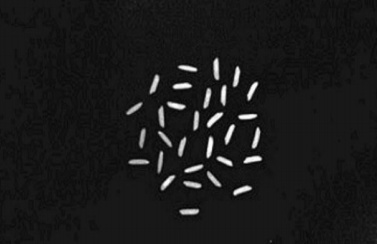


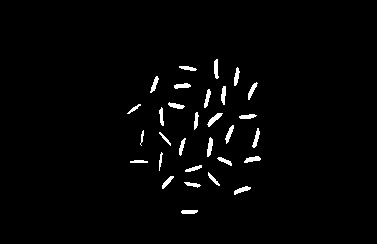


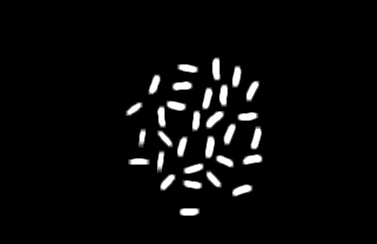


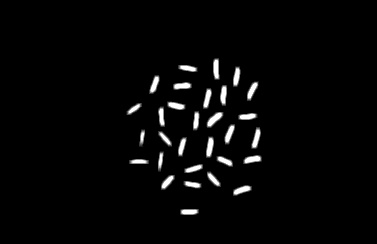


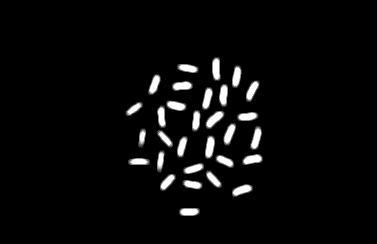


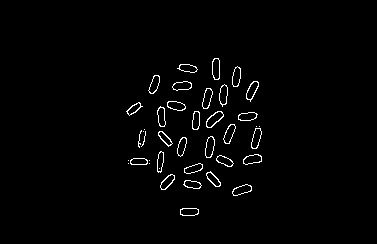

In [67]:
app.layout = html.Div([
	html.Div([
		html.Div([
			html.Img(
				src="logo.jpg",
				style={"height" : "40px", "width" : "40px", "border-radius":"20px"}
			)
		],style={"float":"left","padding" : "5px 0 5px 50px"}),
		html.Div(
			children="Classification and Quality Analysis of Rice",
			style={"float":"left","padding" : "10px 0 10px 10px","font-size": "17px", "font-weight" :"600"}
		),
		html.Div([
			html.Div([html.A("Home",href="#home")], style={"float":"left","padding":"0 10px 0 10px","align-items": "center","font-size": "15px", "font-weight" :"600"}),
			html.Div([html.A("About Project",href="#about-project")], style={"float":"left","padding":"0 10px 0 10px","align-items": "center","font-size": "15px", "font-weight" :"600"}),
			html.Div([html.A("About Us",href="#about-us")], style={"float":"left","padding":"0 10px 0 10px","align-items": "center","font-size": "15px", "font-weight" :"600"}),
			html.Div([html.A("Source Code",href="#bottom")], style={"float":"left","padding":"0 10px 0 10px","align-items": "center","font-size": "15px", "font-weight" :"600"}),
		],style={"float":"right", "padding": "10px 50px 10px 0px"})
	],className="nav"),
	html.Div([],style={"height":"50px"},id="home"),
	html.Div([
		html.H1(children="Visualisation of Results", style={"text-align":"center", "margin":"0", "padding-bottom" : "20px", "color" : "whitesmoke"}),
		html.Div([
			html.Div([
				dcc.Graph(figure=get_plot1(),id="graph1"),
				html.P("Original Image", style={"margin":"0","padding-bottom":"10px"})
			], style = {"display": "block", "justify-content": "center", "align-items": "center", "padding":"0 20px 0 20px"}),
			html.Div([
				dcc.Graph(figure=get_plot2(),id="graph2"),
				html.P("Binary Image", style={"margin":"0","padding-bottom":"10px"})
			], style = {"display": "block", "justify-content": "center", "align-items": "center", "padding":"0 20px 0 20px"}),
		], style = {"display": "flex", "justify-content": "center", "align-items": "center", "text-align":"center"}),
		html.Div([]),
		html.Div([
			html.Div([
				dcc.Upload([
					'Drag and Drop or ',
					html.A('Select a File')
				], 
				style={
					'width': '100%',
					'height': '60px',
					'lineHeight': '60px',
					'borderWidth': '1px',
					'borderStyle': 'dashed',
					'borderRadius': '5px',
					'textAlign': 'center'
				}, id="upload-image"),
			], style = {"display": "block", "justify-content": "center", "align-items": "center", "padding":"0 20px 0 20px"}),
		], style = {"display": "flex", "justify-content": "center", "align-items": "center", "text-align":"center", "width" : "100%"})
	],style = {"color":"black", "padding" : "20px 0 20px 0", "color" : "whitesmoke"},id='plots'),
	html.Div([
		html.H1(children="Images", style={"text-align":"center", "margin":"0", "padding-bottom" : "20px"}),
		html.Div([
			html.Div([
				dcc.Graph(figure=get_image("img.jpg"),id="img"),
				html.P("Original Image", style={"margin":"0","padding-bottom":"10px"})
			], style = {"display": "block", "justify-content": "center", "align-items": "center", "padding":"0 20px 0 20px"}),
			html.Div([
				dcc.Graph(figure=get_image("binary.jpg"),id="binary"),
				html.P("Binary Image", style={"margin":"0","padding-bottom":"10px"})
			], style = {"display": "block", "justify-content": "center", "align-items": "center", "padding":"0 20px 0 20px"}),
			html.Div([
				dcc.Graph(figure=get_image("dst.jpg"),id="dst"),
				html.P("Destination Image", style={"margin":"0","padding-bottom":"10px"})
			], style = {"display": "block", "justify-content": "center", "align-items": "center", "padding":"0 20px 0 20px"})
		], style = {"display": "flex", "justify-content": "center", "align-items": "center", "text-align":"center"}),
		html.Div([]),
		html.Div([
			html.Div([
				dcc.Graph(figure=get_image("erosion.jpg"),id="erosion"),
				html.P("Erosion", style={"margin":"0","padding-bottom":"10px"})
			], style = {"display": "block", "justify-content": "center", "align-items": "center", "padding":"0 20px 0 20px"}),
			html.Div([
				dcc.Graph(figure=get_image("dilation.jpg"),id="dilation"),
				html.P("Dilation", style={"margin":"0","padding-bottom":"10px"})
			], style = {"display": "block", "justify-content": "center", "align-items": "center", "padding":"0 20px 0 20px"}),
			html.Div([
				dcc.Graph(figure=get_image("edges.jpg"),id="edges"),
				html.P("Edge Detection", style={"margin":"0","padding-bottom":"10px"})
			], style = {"display": "block", "justify-content": "center", "align-items": "center", "padding":"0 20px 0 20px"})
		], style = {"display": "flex", "justify-content": "center", "align-items": "center", "text-align":"center"})
	],style = {"color":"black", "background-color" : "lightsteelblue", "border-radius":"40px 40px 40px 40px", "padding" : "20px 0 20px 0"},id='images'),
	html.Div([
		html.H1(children="About Project", style={"text-align":"center"}),
		html.P(children=text1),
		html.P(children=text2),
		html.P(children=text3),
		html.P(children=text4),
		html.P(children=text5),
		html.P(children=text6),
	],style = {"color":"white", "padding":"10px 50px 10px 50px"},id="about-project")
])

In [68]:
@app.callback([Output('img', 'figure'),
              Output('binary', 'figure'),
              Output('dst', 'figure'),
              Output('erosion', 'figure'),
              Output('dilation', 'figure'),
              Output('edges', 'figure'),
              Output('graph1', 'figure'),
              Output('graph2', 'figure')],              
            [Input('upload-image', 'contents')])

SyntaxError: unexpected EOF while parsing (<ipython-input-68-05e7ed200f2f>, line 9)

In [41]:
def update_output(list_of_contents):
	if list_of_contents is not None:
		ind = str(list_of_contents).find(",")
		cla,av,av_ar = update_image(list_of_contents[ind:])
		return get_image("img1.jpg"), get_image("binary1.jpg"), get_image("dst1.jpg"), get_image("erosion1.jpg"), get_image("dilation1.jpg"), get_image("edges1.jpg"), get_plot1(cla, av, av_ar), get_plot2(cla)
	else:
		return get_image("img.jpg"), get_image("binary.jpg"), get_image("dst.jpg"), get_image("erosion.jpg"), get_image("dilation.jpg"), get_image("edges.jpg"), get_plot1(), get_plot2()


In [42]:
if __name__ == '__main__':
    app.run_server(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Sep/2020 17:19:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2020 17:19:57] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2020 17:19:57] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2020 17:19:57] "GET /logo.jpg HTTP/1.1" 200 -
127.0.0.1 - - [28/Sep/2020 17:19:58] "GET /_favicon.ico?v=1.12.0 HTTP/1.1" 200 -
